# Analysis of Randomized Algorithms

## Preamble

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")
import numpy as np
import scipy.stats

In [2]:
data_with_all_columns = pd.read_csv('experiment-data.csv')
data_with_all_columns.head(5)

,PROG,TESTSUITEID,TESTID,TIME,P1X,P1Y,P2X,P2Y,P3X,P3Y,P4X,P4Y,P5X,P5Y,ISVALID,PASSED,MAX_BOLP
0,ALG1,1,1,4.95,29.49,56.63,35.54,40.80,15.93,42.84,45.30,68.17,55.53,61.76,Y,Y,0.068
1,ALG1,1,2,4.96,17.41,23.48,16.67,6.47,37.71,0.00,0.00,4.32,0.00,0.00,N,NaN,0.000
2,ALG1,1,3,5.61,51.75,0.00,51.36,43.69,63.37,28.66,60.14,38.17,67.39,17.30,N,NaN,0.000
3,ALG1,1,4,5.54,19.78,0.00,29.69,1.80,15.08,0.00,16.10,0.00,0.00,0.00,N,NaN,0.000
4,ALG1,1,5,5.93,34.65,0.00,6.14,13.26,18.70,20.92,14.24,15.71,32.23,32.43,N,NaN,0.000


# 1. Data Inspection and Reduction

## 1.1 Data Inspection

In [3]:
# Data Shape
data_shape = data_with_all_columns.shape

print(f"The data file contains a total of {data_shape[0]} rows and {data_shape[1]} columns")

The data file contains a total of 60000 rows and 17 columns


In [4]:
# Initialization of required variables
NALG=data_with_all_columns['PROG'].nunique()
NSUITES=max(data_with_all_columns['TESTSUITEID'])
NTESTS=max(data_with_all_columns['TESTID'])

colors="bgrcm"

print(f"The data file contains results about {NALG} algorithms, {NSUITES} test suites per algorithm, {NTESTS} tests per test suite.")

The data file contains results about 4 algorithms, 30 test suites per algorithm, 500 tests per test suite.


## 1.2 Dropping Columns
As we need only 4 column to prepare our descriptive analysis, it is better to drop rest of the irrelavent information from the dataset.

In [5]:
# Dropping unnecessary columns
data = data_with_all_columns[['PROG','TESTSUITEID', 'TESTID','TIME']]
data.head(5)

,PROG,TESTSUITEID,TESTID,TIME
0,ALG1,1,1,4.95
1,ALG1,1,2,4.96
2,ALG1,1,3,5.61
3,ALG1,1,4,5.54
4,ALG1,1,5,5.93


In [6]:
data.describe()

,TESTSUITEID,TESTID,TIME
count,60000.000000,60000.000000,60000.000000
mean,15.500000,250.500000,11.529297
std,8.655514,144.338481,14.224689
min,1.000000,1.000000,0.030000
25%,8.000000,125.750000,0.620000
50%,15.500000,250.500000,4.520000
75%,23.000000,375.250000,18.590000
max,30.000000,500.000000,55.430000


> **Note:** 
From the above table, we can see the descriptive statistics for the three numeric variables TESTSUITEID, TESTID, and TIME. PROG is a nominal variable thus excluded from here. It displays the values for each variable, including the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum. We can draw a conclusion from the table that on an average it would take roughly about 11.53 seconds to complete a test case, with a standard deviation of roughly 14.22 seconds.

# 2 Descriptive Statistics

In [7]:
nvtalg=[]
for alg in range(1,NALG+1):
    ntests=[]
    for ts in range(1,NSUITES+1):
        ntests.append(data.query("PROG=='ALG%s' & TESTSUITEID==%d" % (alg,ts) )['TIME'].sum())
    nvtalg.append(ntests)
    

## 2.1 Total Time Taken Per Algorithm

In [8]:
time_taken_per_alg= [ np.array([ data.query("PROG=='ALG%s' & TESTSUITEID==%d" % (alg,ts) )['TIME'].sum() for ts in range(1,NSUITES+1) ]).sum() for alg in range(1,NALG+1) ]

In [9]:
for i, total_time_taken in enumerate(time_taken_per_alg):
    print(f"Total time taken to complete all test suites for algorithm {i + 1}, which is {total_time_taken} seconds.")
    print('..............................')

Total time taken to complete all test suites for algorithm 1, which is 451177.02999999997 seconds.
..............................
Total time taken to complete all test suites for algorithm 2, which is 5009.91 seconds.
..............................
Total time taken to complete all test suites for algorithm 3, which is 42635.40000000001 seconds.
..............................
Total time taken to complete all test suites for algorithm 4, which is 192935.47 seconds.
..............................


> **Note:** By considering the time taken per algorithm array, we can say that **Algorithm 2** took less time to finish all the test suits compared to the other algorithms which is about **5000 seconds**.

## 2.2 Average Time Taken Per Test Per Algorithm

In [11]:
avg_time_per_test= [ [ data.query("PROG=='ALG%s' & TESTSUITEID==%d" % (alg,ts) )['TIME'].sum()/NTESTS for ts in range(1,NSUITES+1) ] for alg in range(1,NALG+1) ]

In [12]:
for i, alg in enumerate(avg_time_per_test):
    print(f"On an average for algorithm {i + 1}, each test suites took {np.mean(alg)} seconds to process each test.")
    print('..............................')

On an average for algorithm 1, each test suites took 30.078468666666662 seconds to process each test.
..............................
On an average for algorithm 2, each test suites took 0.33399399999999996 seconds to process each test.
..............................
On an average for algorithm 3, each test suites took 2.8423599999999993 seconds to process each test.
..............................
On an average for algorithm 4, each test suites took 12.862364666666668 seconds to process each test.
..............................


> **Note:** The result of average time taken by each test case of each test suites also suggests that **Algorithm 2** took less time to finish all the test suits compared to the other algorithms which is about **30 seconds**.

## 2.3 Minimum and Maximum Time Take Per Algorithm

In [13]:
for i, alg in enumerate(nvtalg):
    print(f"A minimum time taken to run a test suites for Algorith {i + 1} is {np.min(alg)} seconds")
    print(f"A maximum time taken to run a test suites for Algorith {i + 1} is {np.max(alg)} seconds")
    print('..............................')

A minimum time taken to run a test suites for Algorith 1 is 15027.05 seconds
A maximum time taken to run a test suites for Algorith 1 is 15050.309999999998 seconds
..............................
A minimum time taken to run a test suites for Algorith 2 is 154.96 seconds
A maximum time taken to run a test suites for Algorith 2 is 175.04000000000002 seconds
..............................
A minimum time taken to run a test suites for Algorith 3 is 1413.5700000000002 seconds
A maximum time taken to run a test suites for Algorith 3 is 1427.88 seconds
..............................
A minimum time taken to run a test suites for Algorith 4 is 6422.81 seconds
A maximum time taken to run a test suites for Algorith 4 is 6442.42 seconds
..............................


## 2.4 Mean, Median, Mode, Standard Deviation of Each Test Suites Per Algorithm

In [14]:
alg_mean = np.mean(nvtalg,axis=1)

print('On an average completing all the tests in all the test suites for each algorithm taken:')
for i, mean in enumerate(alg_mean):
    print(f"Mean average time taken to run all test suites: Algorith {i + 1} has taken {mean} seconds")

On an average completing all the tests in all the test suites for each algorithm taken:
Mean average time taken to run all test suites: Algorith 1 has taken 15039.234333333332 seconds
Mean average time taken to run all test suites: Algorith 2 has taken 166.99699999999999 seconds
Mean average time taken to run all test suites: Algorith 3 has taken 1421.1800000000003 seconds
Mean average time taken to run all test suites: Algorith 4 has taken 6431.182333333333 seconds


In [15]:
alg_median = np.median(nvtalg,axis=1)

for i, median in enumerate(alg_median):
    print(f"Mean average time taken to run all test suites: Algorith {i + 1} has taken {median} seconds")

Mean average time taken to run all test suites: Algorith 1 has taken 15040.0 seconds
Mean average time taken to run all test suites: Algorith 2 has taken 166.675 seconds
Mean average time taken to run all test suites: Algorith 3 has taken 1421.7 seconds
Mean average time taken to run all test suites: Algorith 4 has taken 6430.695000000001 seconds


> **Note:** From the above two results, we can observe that both **mean and median** of each algorithm are **very close** to each other in seconds. Which means that the sum of tests for each test suite **has a symmetrical distribution**.

In [16]:
np.std(nvtalg,axis=1)

array([4.5754349 , 3.79504866, 4.03718962, 4.31823165])

> **Note:** 
From the standard deviation results, it indicates that, on average, the ALG1 test suite generation times deviate from the mean time by 4.58 seconds. It suggests that ALG1's test suite generation times shows a moderate degree of variability. Among all algorithms, ALG2 has the least variability (standard deviation: 3.80), suggesting more stable generation times. Compared to ALG2, ALG1, ALG3, and ALG4 show somewhat less consistent generation times, with standard deviations ranging from 4.04 to 4.58 seconds, indicating moderate levels of variability.

## 2.5 Visual Representaions

### 2.5.1 Stair Case Plot
To get a better view about how each test suites taken time for an algorithm, we can draw stair case plot. Here, we can see the variation of total time taken by each test suites under an algorithm.

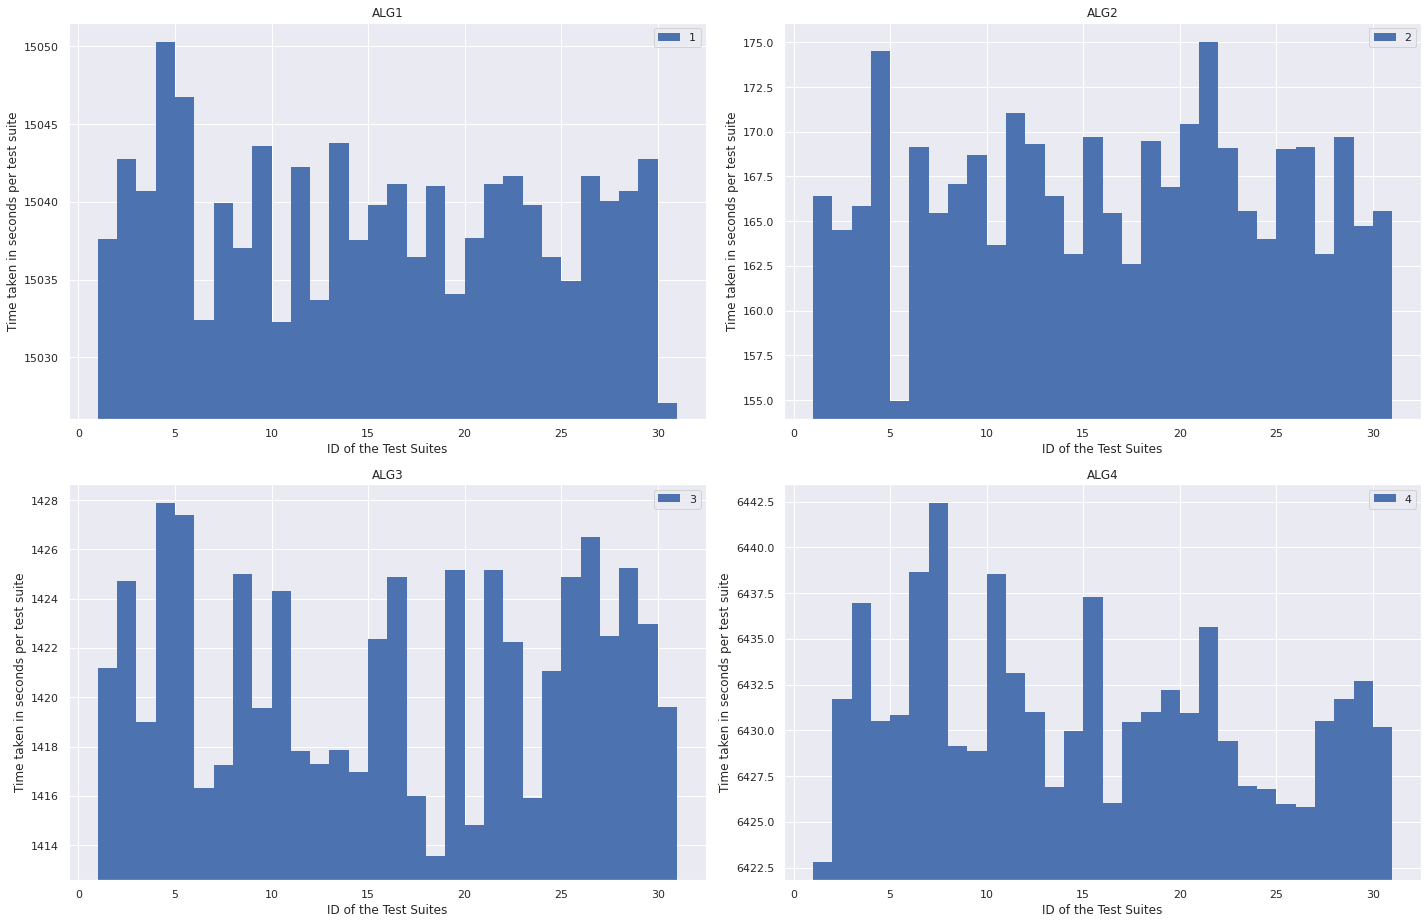

In [45]:
plt.figure(figsize=(20, 13))
for alg in range(NALG):
    plt.subplot(2,2,alg+1)
    
    plt.stairs(np.array(nvtalg[alg]), range(1, 32), baseline=np.min(nvtalg[alg]) - 1, fill=True)
    #plt.xlim(100,225)
    #plt.ylim(0,10)
    plt.xlabel("ID of the Test Suites")
    plt.ylabel("Time taken in seconds per test suite")
    plt.legend(str(alg+1))
    plt.title("ALG"+str(alg+1))

plt.show()

### 2.5.2 Histogram Plot

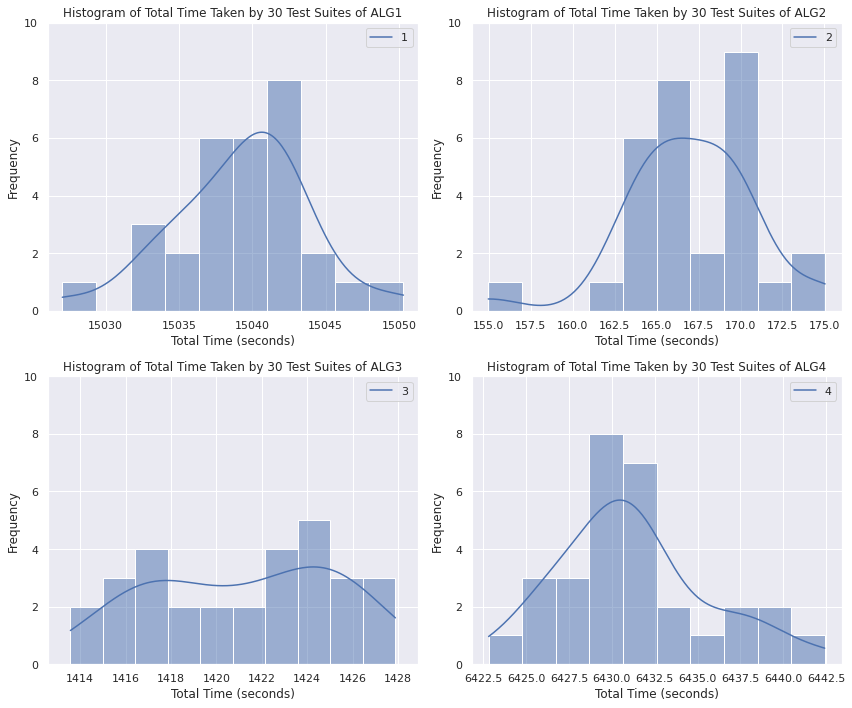

In [47]:
import seaborn as sns
plt.figure(figsize=(12, 10))
for alg in range(NALG):
    plt.subplot(2,2,alg+1)
    
    # plt.hist(nvtalg[alg], bins=10, color=colors[alg], edgecolor='black', alpha=0.7)
    sns.histplot(nvtalg[alg], bins=10, kde=True)
    
    plt.xlabel('Total Time (seconds)')
    plt.ylabel('Frequency')
    plt.title("Histogram of Total Time Taken by 30 Test Suites of ALG"+str(alg+1))
    plt.grid(True)
    plt.xlim(np.min(nvtalg[alg]) - 1 , np.max(nvtalg[alg]) + 1)
    plt.ylim(0,10)
    plt.legend(str(alg+1))
    plt.tight_layout()

plt.show()

> **Note:** In conclusion from the above histogram plots we can say that ALG1 and ALG2 has quite symmetrical/normal distribution in them. While ALG3 and ALG4 are quite widespreaded and shows some more peaks in it. Below are the specific observations.
1. For ALG1, the data shows variability in execution times, which reflects the performance and efficiency of ALG1, while a peak at 15040 seconds suggests a sizable number of test suites completed in that timeframe. Also it has bell shape which suggest that it is normally distributed.
2. For ALG2, it is quite narrow spreaded, peak is at 160 seconds and it also has a bell curve suggesting normal distrubution. while it has a outlier on the left side/min value.
3. For ALG3, it is quite wide spreaded, multiple peaks and it does not have a normal distribution in it.
4. For ALG4, it is also quite wide spreaded, also has few ups and down while main peak is at 6430 seconds. It also has many outliers.

### 2.5.3 Box Plot

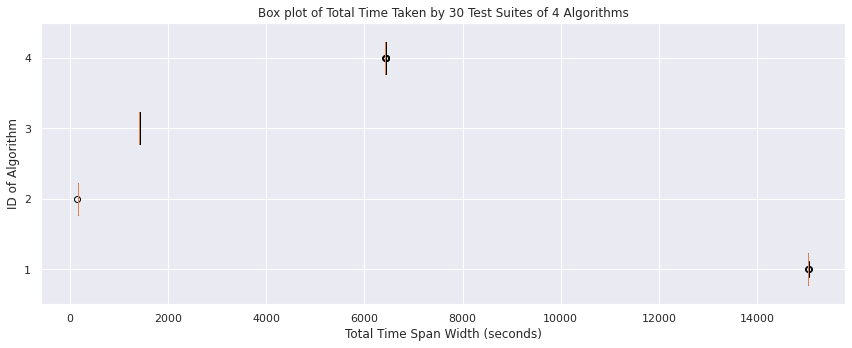

In [48]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True
plt.boxplot(nvtalg, vert=False)
plt.xlabel('Total Time Span Width (seconds)')
plt.ylabel('ID of Algorithm')
plt.title("Box plot of Total Time Taken by 30 Test Suites of 4 Algorithms")
plt.show()

> **Note:** From the figure above it is very difficult to understand anything. It is due to the large variance among the different algorithms' ranges (minimum and maximum values). It is better to analyze individual box plots to express something.

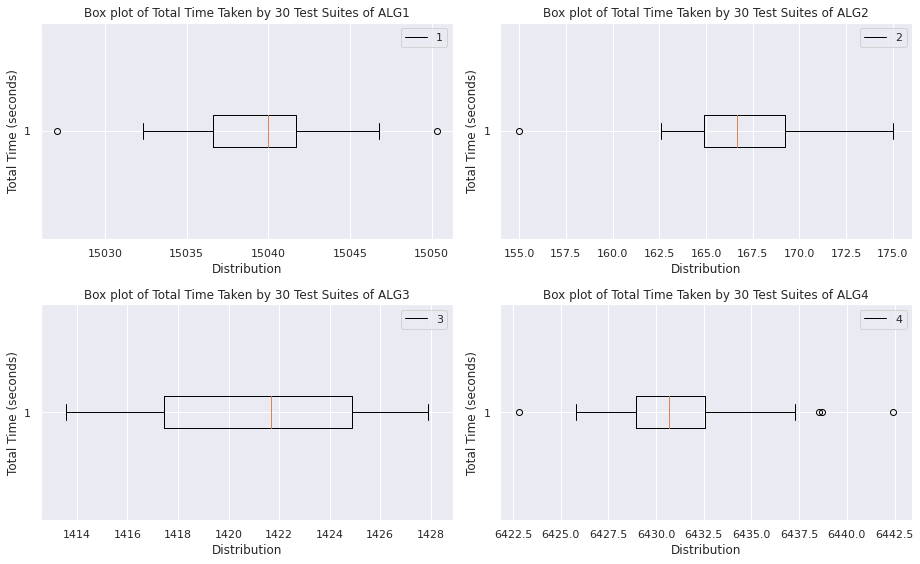

In [49]:
plt.figure(figsize=(13, 8))
for alg in range(NALG):
    plt.subplot(2,2,alg+1)
    
    plt.boxplot(nvtalg[alg], vert=False)
    plt.xlabel('Distribution')
    plt.ylabel('Total Time (seconds)')
    plt.title("Box plot of Total Time Taken by 30 Test Suites of ALG"+str(alg+1))
    plt.legend(str(alg+1))
    plt.xlim(np.min(nvtalg[alg]) - 1 ,np.max(nvtalg[alg]) + 1)

plt.show()

> **Note:** From those box plots above, we can conclude below observations
1. ALG1: It has one outlier at both min and max end which can effect calculating the mean value. Also, most of the test suites span within a short interquartile range, spreaded within a range of 23.26 seconds. The majority of the data points are centered in the range of 15035 to 15045 seconds. The narrow spread suggests that there isn't much variation in this area in the data. The two outliers may indicate that there are some mistakes in data collection that requires further check. The median is at Q3 or 75% of the data.
2. ALG2: It has an outlier with very quick run time which does not represent the all other test suites runtime. The majority of the data points are centered in the range of 164.6775 to 169.3425 seconds. The narrow range (IQR of 4.665 seconds) suggests that there isn't much variation in this area in the data. The single outlier can affect the mean calculation which may not be a true mean.
3. ALG3: It is quite widespread and timing varies from 1417 seconds to 1425 seconds. Median is nearly at the center or near to the mean. We can also verify from histogram that data is quite scattered for this ALG3.
4. ALG4: It has a single outlier below the minimum value and also has many outliers after the maximum value of the interquartile. Meaning that data is not reliable and we need to check the data. It is also quite widespread in run times. Data points are spreaded around 6428.4175 to 6432.8125 range. Also, mean and median are quite similar for this box plot.